<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/main/It%20works!CS4287_Assign2_19248547_19256434_19232845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xception architecture**

Start off by connecting to the Google Drive, since we are using Colab, we opted to store the dataset in a Google Drive for ease of access when calling for the flow from directory.....

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the modules needed for the code

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

Set the train and test path and declare the epoch number and batch size

In [13]:
train_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/test"

epochs = 5
batch_size = 64

Plot 9 random images from the test folder as a sample for data visualisation using the pyplot import

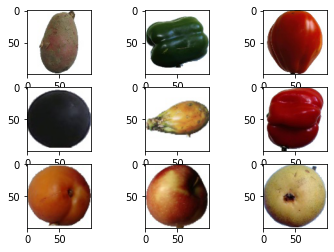

In [14]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()

Building and Training the data


*   List item
*   List item



In [15]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    subset = 'validation',
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16855 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Found 5651 images belonging to 1 classes.


In [25]:
base_model = applications.Xception(weights='imagenet', 
                              include_top=True, 
                              input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(33, activation="softmax"))

input_shape = (None, 299, 299, 3)
model.build(input_shape)
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

91884032/91884032 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1025024   
                                                                 
 dense_5 (Dense)             (None, 33)                33825     
                                                                 
Total params: 23,969,329
Trainable params: 6,271,497
Non-trainable params: 17,697,832
_________________________________________________________________


In [20]:
checkpoint = ModelCheckpoint("xception", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model.fit(train_generator,  
                                    validation_data=validation_generator,                    
                                    epochs=epochs,
                                    steps_per_epoch = batch_size,
                                    validation_steps=10,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/5


 1/64 [..............................] - ETA: 22:33 - loss: 3.5126 - accuracy: 0.0312

 2/64 [..............................] - ETA: 15:14 - loss: 5.2718 - accuracy: 0.0938

 3/64 [>.............................] - ETA: 14:43 - loss: 6.4655 - accuracy: 0.0625

 4/64 [>.............................] - ETA: 14:22 - loss: 5.8204 - accuracy: 0.0703

 5/64 [=>............................] - ETA: 14:19 - loss: 5.3240 - accuracy: 0.0812

 6/64 [=>............................] - ETA: 14:14 - loss: 4.9629 - accuracy: 0.1146

 7/64 [==>...........................] - ETA: 13:58 - loss: 4.7265 - accuracy: 0.1161

 8/64 [==>...........................] - ETA: 13:38 - loss: 4.6314 - accuracy: 0.1250

 9/64 [===>..........................] - ETA: 13:20 - loss: 4.5631 - accuracy: 0.1319

10/64 [===>..........................] - ETA: 13:03 - loss: 4.4504 - accuracy: 0.1281

11/64 [====>.........................] - ETA: 12:47 - loss: 4.3138 - accuracy: 0.1364

12/64 [====>.........................] - ETA: 12:31 - loss: 4.2160 - accuracy: 0.1406

13/64 [=====>........................] - ETA: 12:19 - loss: 4.0976 - accuracy: 0.1514

14/64 [=====>........................] - ETA: 12:03 - loss: 4.0029 - accuracy: 0.1607

15/64 [======>.......................] - ETA: 11:49 - loss: 3.8805 - accuracy: 0.1750

16/64 [======>.......................] - ETA: 11:46 - loss: 3.7836 - accuracy: 0.1836

17/64 [======>.......................] - ETA: 11:30 - loss: 3.7182 - accuracy: 0.1893

18/64 [=======>......................] - ETA: 11:33 - loss: 3.6472 - accuracy: 0.1979

19/64 [=======>......................] - ETA: 11:18 - loss: 3.5903 - accuracy: 0.1990

20/64 [========>.....................] - ETA: 11:01 - loss: 3.5312 - accuracy: 0.2031

21/64 [========>.....................] - ETA: 10:45 - loss: 3.4768 - accuracy: 0.2173

22/64 [=========>....................] - ETA: 10:28 - loss: 3.4258 - accuracy: 0.2230

23/64 [=========>....................] - ETA: 10:11 - loss: 3.3707 - accuracy: 0.2337

24/64 [==========>...................] - ETA: 9:55 - loss: 3.3298 - accuracy: 0.2344 

25/64 [==========>...................] - ETA: 9:39 - loss: 3.2951 - accuracy: 0.2375

26/64 [===========>..................] - ETA: 9:24 - loss: 3.2501 - accuracy: 0.2428

27/64 [===========>..................] - ETA: 9:08 - loss: 3.2082 - accuracy: 0.2488

28/64 [============>.................] - ETA: 8:52 - loss: 3.1587 - accuracy: 0.2567

29/64 [============>.................] - ETA: 8:36 - loss: 3.1227 - accuracy: 0.2608

30/64 [=============>................] - ETA: 8:20 - loss: 3.0795 - accuracy: 0.2688

31/64 [=============>................] - ETA: 8:05 - loss: 3.0446 - accuracy: 0.2752

32/64 [==============>...............] - ETA: 7:49 - loss: 3.0152 - accuracy: 0.2793

33/64 [==============>...............] - ETA: 7:34 - loss: 2.9870 - accuracy: 0.2822

34/64 [==============>...............] - ETA: 7:19 - loss: 2.9640 - accuracy: 0.2849

35/64 [===============>..............] - ETA: 7:04 - loss: 2.9338 - accuracy: 0.2911

36/64 [===============>..............] - ETA: 6:53 - loss: 2.9124 - accuracy: 0.2934

37/64 [================>.............] - ETA: 6:37 - loss: 2.9017 - accuracy: 0.2922

38/64 [================>.............] - ETA: 6:23 - loss: 2.8874 - accuracy: 0.2944

39/64 [=================>............] - ETA: 6:10 - loss: 2.8502 - accuracy: 0.3029

40/64 [=================>............] - ETA: 5:55 - loss: 2.8161 - accuracy: 0.3109

41/64 [==================>...........] - ETA: 5:39 - loss: 2.8005 - accuracy: 0.3125

42/64 [==================>...........] - ETA: 5:24 - loss: 2.7830 - accuracy: 0.3125

43/64 [===================>..........] - ETA: 5:09 - loss: 2.7531 - accuracy: 0.3183

44/64 [===================>..........] - ETA: 4:54 - loss: 2.7277 - accuracy: 0.3246

45/64 [====================>.........] - ETA: 4:39 - loss: 2.7104 - accuracy: 0.3257

46/64 [====================>.........] - ETA: 4:24 - loss: 2.6946 - accuracy: 0.3288

47/64 [=====================>........] - ETA: 4:09 - loss: 2.6749 - accuracy: 0.3331

48/64 [=====================>........] - ETA: 3:55 - loss: 2.6525 - accuracy: 0.3379

49/64 [=====================>........] - ETA: 3:40 - loss: 2.6383 - accuracy: 0.3406

50/64 [======================>.......] - ETA: 3:26 - loss: 2.6182 - accuracy: 0.3413

51/64 [======================>.......] - ETA: 3:11 - loss: 2.5978 - accuracy: 0.3450

52/64 [=======================>......] - ETA: 2:56 - loss: 2.5743 - accuracy: 0.3510

53/64 [=======================>......] - ETA: 2:40 - loss: 2.5587 - accuracy: 0.3557

54/64 [========================>.....] - ETA: 2:26 - loss: 2.5428 - accuracy: 0.3583

55/64 [========================>.....] - ETA: 2:11 - loss: 2.5241 - accuracy: 0.3604

56/64 [=========================>....] - ETA: 1:57 - loss: 2.5074 - accuracy: 0.3646

57/64 [=========================>....] - ETA: 1:42 - loss: 2.4911 - accuracy: 0.3691

58/64 [==========================>...] - ETA: 1:27 - loss: 2.4755 - accuracy: 0.3725

59/64 [==========================>...] - ETA: 1:13 - loss: 2.4563 - accuracy: 0.3757

60/64 [===========================>..] - ETA: 59s - loss: 2.4559 - accuracy: 0.3752 

61/64 [===========================>..] - ETA: 44s - loss: 2.4434 - accuracy: 0.3778

62/64 [============================>.] - ETA: 29s - loss: 2.4261 - accuracy: 0.3803

63/64 [============================>.] - ETA: 14s - loss: 2.4166 - accuracy: 0.3812

64/64 [==============================] - 1060s 16s/step - loss: 2.3990 - accuracy: 0.3860 - val_loss: 4.6065 - val_accuracy: 0.3219
Epoch 2/5


 1/64 [..............................] - ETA: 21:06 - loss: 1.5987 - accuracy: 0.5000

 2/64 [..............................] - ETA: 15:05 - loss: 1.4438 - accuracy: 0.5781

 3/64 [>.............................] - ETA: 14:47 - loss: 1.4300 - accuracy: 0.6042

 4/64 [>.............................] - ETA: 14:27 - loss: 1.3444 - accuracy: 0.6172

 5/64 [=>............................] - ETA: 14:08 - loss: 1.3496 - accuracy: 0.6125

 6/64 [=>............................] - ETA: 13:55 - loss: 1.2741 - accuracy: 0.6302

 7/64 [==>...........................] - ETA: 13:39 - loss: 1.3141 - accuracy: 0.6071

 8/64 [==>...........................] - ETA: 13:26 - loss: 1.3603 - accuracy: 0.5898

 9/64 [===>..........................] - ETA: 13:11 - loss: 1.3777 - accuracy: 0.6076

10/64 [===>..........................] - ETA: 12:55 - loss: 1.3908 - accuracy: 0.6000

11/64 [====>.........................] - ETA: 12:40 - loss: 1.4294 - accuracy: 0.5909

12/64 [====>.........................] - ETA: 12:25 - loss: 1.4175 - accuracy: 0.5964

13/64 [=====>........................] - ETA: 12:10 - loss: 1.3841 - accuracy: 0.6010

14/64 [=====>........................] - ETA: 11:55 - loss: 1.3915 - accuracy: 0.5915

15/64 [======>.......................] - ETA: 11:47 - loss: 1.3805 - accuracy: 0.5958

16/64 [======>.......................] - ETA: 12:01 - loss: 1.3762 - accuracy: 0.5938

17/64 [======>.......................] - ETA: 12:08 - loss: 1.3742 - accuracy: 0.5919

18/64 [=======>......................] - ETA: 11:49 - loss: 1.3443 - accuracy: 0.6042

19/64 [=======>......................] - ETA: 11:31 - loss: 1.3473 - accuracy: 0.6069

20/64 [========>.....................] - ETA: 11:23 - loss: 1.3301 - accuracy: 0.6094

21/64 [========>.....................] - ETA: 11:05 - loss: 1.3336 - accuracy: 0.6027

22/64 [=========>....................] - ETA: 10:47 - loss: 1.3387 - accuracy: 0.5980

23/64 [=========>....................] - ETA: 10:32 - loss: 1.3280 - accuracy: 0.6019

24/64 [==========>...................] - ETA: 10:14 - loss: 1.3079 - accuracy: 0.6068

25/64 [==========>...................] - ETA: 10:09 - loss: 1.3067 - accuracy: 0.6087

26/64 [===========>..................] - ETA: 9:53 - loss: 1.3109 - accuracy: 0.6058 

27/64 [===========>..................] - ETA: 9:35 - loss: 1.3145 - accuracy: 0.6100

28/64 [============>.................] - ETA: 9:18 - loss: 1.3264 - accuracy: 0.6083

29/64 [============>.................] - ETA: 9:01 - loss: 1.3337 - accuracy: 0.6056

30/64 [=============>................] - ETA: 8:45 - loss: 1.3341 - accuracy: 0.6052

31/64 [=============>................] - ETA: 8:29 - loss: 1.3235 - accuracy: 0.6058

32/64 [==============>...............] - ETA: 8:13 - loss: 1.3128 - accuracy: 0.6094

33/64 [==============>...............] - ETA: 7:56 - loss: 1.3133 - accuracy: 0.6117

34/64 [==============>...............] - ETA: 7:40 - loss: 1.2993 - accuracy: 0.6186

35/64 [===============>..............] - ETA: 7:24 - loss: 1.2918 - accuracy: 0.6214

36/64 [===============>..............] - ETA: 7:08 - loss: 1.2904 - accuracy: 0.6215

37/64 [================>.............] - ETA: 6:52 - loss: 1.2893 - accuracy: 0.6233

38/64 [================>.............] - ETA: 6:37 - loss: 1.2791 - accuracy: 0.6234

39/64 [=================>............] - ETA: 6:21 - loss: 1.2758 - accuracy: 0.6274

40/64 [=================>............] - ETA: 6:08 - loss: 1.2745 - accuracy: 0.6266

41/64 [==================>...........] - ETA: 5:52 - loss: 1.2678 - accuracy: 0.6265

42/64 [==================>...........] - ETA: 5:37 - loss: 1.2615 - accuracy: 0.6287

43/64 [===================>..........] - ETA: 5:21 - loss: 1.2545 - accuracy: 0.6308

44/64 [===================>..........] - ETA: 5:05 - loss: 1.2449 - accuracy: 0.6328

45/64 [====================>.........] - ETA: 4:49 - loss: 1.2443 - accuracy: 0.6326

46/64 [====================>.........] - ETA: 4:34 - loss: 1.2350 - accuracy: 0.6345

47/64 [=====================>........] - ETA: 4:18 - loss: 1.2236 - accuracy: 0.6390

48/64 [=====================>........] - ETA: 4:03 - loss: 1.2217 - accuracy: 0.6400

49/64 [=====================>........] - ETA: 3:47 - loss: 1.2168 - accuracy: 0.6422

50/64 [======================>.......] - ETA: 3:32 - loss: 1.2193 - accuracy: 0.6431

51/64 [======================>.......] - ETA: 3:16 - loss: 1.2175 - accuracy: 0.6428

52/64 [=======================>......] - ETA: 3:01 - loss: 1.2161 - accuracy: 0.6418

53/64 [=======================>......] - ETA: 2:46 - loss: 1.2120 - accuracy: 0.6445

54/64 [========================>.....] - ETA: 2:30 - loss: 1.2123 - accuracy: 0.6447

55/64 [========================>.....] - ETA: 2:15 - loss: 1.2075 - accuracy: 0.6443

56/64 [=========================>....] - ETA: 2:00 - loss: 1.2019 - accuracy: 0.6451

57/64 [=========================>....] - ETA: 1:45 - loss: 1.2009 - accuracy: 0.6458

58/64 [==========================>...] - ETA: 1:30 - loss: 1.1950 - accuracy: 0.6466

59/64 [==========================>...] - ETA: 1:15 - loss: 1.1881 - accuracy: 0.6467

60/64 [===========================>..] - ETA: 1:00 - loss: 1.1768 - accuracy: 0.6500

61/64 [===========================>..] - ETA: 45s - loss: 1.1676 - accuracy: 0.6511 

62/64 [============================>.] - ETA: 30s - loss: 1.1561 - accuracy: 0.6557

63/64 [============================>.] - ETA: 15s - loss: 1.1520 - accuracy: 0.6572

64/64 [==============================] - 1084s 17s/step - loss: 1.1490 - accuracy: 0.6572 - val_loss: 1.2297 - val_accuracy: 0.6375
Epoch 3/5


 1/64 [..............................] - ETA: 17:29 - loss: 0.9288 - accuracy: 0.5938

 2/64 [..............................] - ETA: 15:34 - loss: 0.7207 - accuracy: 0.6875

 3/64 [>.............................] - ETA: 14:56 - loss: 0.7540 - accuracy: 0.6875

 4/64 [>.............................] - ETA: 14:48 - loss: 0.8043 - accuracy: 0.6953

 5/64 [=>............................] - ETA: 14:25 - loss: 0.7685 - accuracy: 0.7125

 6/64 [=>............................] - ETA: 14:11 - loss: 0.7598 - accuracy: 0.7344

 7/64 [==>...........................] - ETA: 14:33 - loss: 0.7488 - accuracy: 0.7411

 8/64 [==>...........................] - ETA: 14:08 - loss: 0.7583 - accuracy: 0.7344

 9/64 [===>..........................] - ETA: 13:48 - loss: 0.7844 - accuracy: 0.7222

10/64 [===>..........................] - ETA: 13:30 - loss: 0.7847 - accuracy: 0.7188

11/64 [====>.........................] - ETA: 13:12 - loss: 0.7791 - accuracy: 0.7244

12/64 [====>.........................] - ETA: 12:55 - loss: 0.7888 - accuracy: 0.7266

13/64 [=====>........................] - ETA: 12:38 - loss: 0.7677 - accuracy: 0.7356

14/64 [=====>........................] - ETA: 12:23 - loss: 0.7611 - accuracy: 0.7411

15/64 [======>.......................] - ETA: 12:07 - loss: 0.7466 - accuracy: 0.7437

16/64 [======>.......................] - ETA: 11:50 - loss: 0.7772 - accuracy: 0.7363

17/64 [======>.......................] - ETA: 11:34 - loss: 0.7830 - accuracy: 0.7353

18/64 [=======>......................] - ETA: 11:18 - loss: 0.7911 - accuracy: 0.7344

19/64 [=======>......................] - ETA: 11:02 - loss: 0.7883 - accuracy: 0.7352

20/64 [========>.....................] - ETA: 10:50 - loss: 0.7759 - accuracy: 0.7391

21/64 [========>.....................] - ETA: 10:38 - loss: 0.7766 - accuracy: 0.7411

22/64 [=========>....................] - ETA: 10:22 - loss: 0.7761 - accuracy: 0.7415

23/64 [=========>....................] - ETA: 10:07 - loss: 0.7736 - accuracy: 0.7432

24/64 [==========>...................] - ETA: 9:51 - loss: 0.7656 - accuracy: 0.7461 

25/64 [==========>...................] - ETA: 9:38 - loss: 0.7626 - accuracy: 0.7487

26/64 [===========>..................] - ETA: 9:30 - loss: 0.7555 - accuracy: 0.7500

27/64 [===========>..................] - ETA: 9:14 - loss: 0.7537 - accuracy: 0.7500

28/64 [============>.................] - ETA: 8:58 - loss: 0.7642 - accuracy: 0.7467

29/64 [============>.................] - ETA: 8:42 - loss: 0.7641 - accuracy: 0.7478

30/64 [=============>................] - ETA: 8:27 - loss: 0.7638 - accuracy: 0.7479

31/64 [=============>................] - ETA: 8:11 - loss: 0.7666 - accuracy: 0.7450

32/64 [==============>...............] - ETA: 7:56 - loss: 0.7687 - accuracy: 0.7451

33/64 [==============>...............] - ETA: 7:40 - loss: 0.7603 - accuracy: 0.7481

34/64 [==============>...............] - ETA: 7:30 - loss: 0.7544 - accuracy: 0.7509

35/64 [===============>..............] - ETA: 7:14 - loss: 0.7541 - accuracy: 0.7518

36/64 [===============>..............] - ETA: 6:59 - loss: 0.7600 - accuracy: 0.7509

37/64 [================>.............] - ETA: 6:43 - loss: 0.7531 - accuracy: 0.7542

38/64 [================>.............] - ETA: 6:28 - loss: 0.7567 - accuracy: 0.7541

39/64 [=================>............] - ETA: 6:13 - loss: 0.7515 - accuracy: 0.7572

40/64 [=================>............] - ETA: 5:58 - loss: 0.7454 - accuracy: 0.7586

41/64 [==================>...........] - ETA: 5:42 - loss: 0.7433 - accuracy: 0.7599

42/64 [==================>...........] - ETA: 5:27 - loss: 0.7434 - accuracy: 0.7604

43/64 [===================>..........] - ETA: 5:12 - loss: 0.7475 - accuracy: 0.7594

44/64 [===================>..........] - ETA: 4:57 - loss: 0.7388 - accuracy: 0.7614

45/64 [====================>.........] - ETA: 4:42 - loss: 0.7278 - accuracy: 0.7653

46/64 [====================>.........] - ETA: 4:28 - loss: 0.7238 - accuracy: 0.7663

47/64 [=====================>........] - ETA: 4:13 - loss: 0.7296 - accuracy: 0.7633

48/64 [=====================>........] - ETA: 3:58 - loss: 0.7254 - accuracy: 0.7650

49/64 [=====================>........] - ETA: 3:43 - loss: 0.7276 - accuracy: 0.7634

50/64 [======================>.......] - ETA: 3:28 - loss: 0.7205 - accuracy: 0.7656

51/64 [======================>.......] - ETA: 3:13 - loss: 0.7163 - accuracy: 0.7678

52/64 [=======================>......] - ETA: 2:58 - loss: 0.7098 - accuracy: 0.7704

53/64 [=======================>......] - ETA: 2:43 - loss: 0.7116 - accuracy: 0.7700

54/64 [========================>.....] - ETA: 2:28 - loss: 0.7117 - accuracy: 0.7708

55/64 [========================>.....] - ETA: 2:13 - loss: 0.7074 - accuracy: 0.7733

56/64 [=========================>....] - ETA: 1:58 - loss: 0.7068 - accuracy: 0.7746

57/64 [=========================>....] - ETA: 1:43 - loss: 0.7001 - accuracy: 0.7763

58/64 [==========================>...] - ETA: 1:29 - loss: 0.6947 - accuracy: 0.7780

59/64 [==========================>...] - ETA: 1:14 - loss: 0.6944 - accuracy: 0.7781

60/64 [===========================>..] - ETA: 59s - loss: 0.6886 - accuracy: 0.7802 

61/64 [===========================>..] - ETA: 44s - loss: 0.6837 - accuracy: 0.7823

62/64 [============================>.] - ETA: 29s - loss: 0.6842 - accuracy: 0.7807

63/64 [============================>.] - ETA: 14s - loss: 0.6845 - accuracy: 0.7803

64/64 [==============================] - 1061s 17s/step - loss: 0.6834 - accuracy: 0.7817 - val_loss: 0.7089 - val_accuracy: 0.7688
Epoch 4/5


 1/64 [..............................] - ETA: 21:19 - loss: 0.4365 - accuracy: 0.8438

 2/64 [..............................] - ETA: 15:09 - loss: 0.3544 - accuracy: 0.8750

 3/64 [>.............................] - ETA: 14:36 - loss: 0.3999 - accuracy: 0.8646

 4/64 [>.............................] - ETA: 14:17 - loss: 0.3865 - accuracy: 0.8750

 5/64 [=>............................] - ETA: 14:02 - loss: 0.4461 - accuracy: 0.8625

 6/64 [=>............................] - ETA: 13:47 - loss: 0.4076 - accuracy: 0.8802

 7/64 [==>...........................] - ETA: 13:30 - loss: 0.4105 - accuracy: 0.8839

 8/64 [==>...........................] - ETA: 13:15 - loss: 0.4212 - accuracy: 0.8867

 9/64 [===>..........................] - ETA: 13:00 - loss: 0.4188 - accuracy: 0.8819

10/64 [===>..........................] - ETA: 12:45 - loss: 0.4182 - accuracy: 0.8813

11/64 [====>.........................] - ETA: 12:31 - loss: 0.4683 - accuracy: 0.8750

12/64 [====>.........................] - ETA: 12:35 - loss: 0.4631 - accuracy: 0.8750

13/64 [=====>........................] - ETA: 12:24 - loss: 0.4617 - accuracy: 0.8774

14/64 [=====>........................] - ETA: 12:09 - loss: 0.4606 - accuracy: 0.8772

15/64 [======>.......................] - ETA: 11:53 - loss: 0.4584 - accuracy: 0.8771

16/64 [======>.......................] - ETA: 11:38 - loss: 0.4599 - accuracy: 0.8730

17/64 [======>.......................] - ETA: 11:23 - loss: 0.4717 - accuracy: 0.8713

18/64 [=======>......................] - ETA: 11:07 - loss: 0.4675 - accuracy: 0.8733

19/64 [=======>......................] - ETA: 10:52 - loss: 0.4543 - accuracy: 0.8766

20/64 [========>.....................] - ETA: 10:37 - loss: 0.4543 - accuracy: 0.8750

21/64 [========>.....................] - ETA: 10:22 - loss: 0.4492 - accuracy: 0.8780

22/64 [=========>....................] - ETA: 10:07 - loss: 0.4674 - accuracy: 0.8679

23/64 [=========>....................] - ETA: 9:52 - loss: 0.4770 - accuracy: 0.8601 

24/64 [==========>...................] - ETA: 9:37 - loss: 0.4767 - accuracy: 0.8581

25/64 [==========>...................] - ETA: 9:22 - loss: 0.4791 - accuracy: 0.8587

26/64 [===========>..................] - ETA: 9:07 - loss: 0.4727 - accuracy: 0.8594

27/64 [===========>..................] - ETA: 8:52 - loss: 0.4715 - accuracy: 0.8576

28/64 [============>.................] - ETA: 8:37 - loss: 0.4871 - accuracy: 0.8560

29/64 [============>.................] - ETA: 8:23 - loss: 0.4813 - accuracy: 0.8588

30/64 [=============>................] - ETA: 8:08 - loss: 0.4778 - accuracy: 0.8604

31/64 [=============>................] - ETA: 7:54 - loss: 0.4871 - accuracy: 0.8569

32/64 [==============>...............] - ETA: 7:40 - loss: 0.4893 - accuracy: 0.8555

33/64 [==============>...............] - ETA: 7:25 - loss: 0.4902 - accuracy: 0.8542

34/64 [==============>...............] - ETA: 7:14 - loss: 0.4908 - accuracy: 0.8548

35/64 [===============>..............] - ETA: 6:59 - loss: 0.4991 - accuracy: 0.8518

36/64 [===============>..............] - ETA: 6:45 - loss: 0.4927 - accuracy: 0.8533

37/64 [================>.............] - ETA: 6:30 - loss: 0.4875 - accuracy: 0.8556

38/64 [================>.............] - ETA: 6:15 - loss: 0.4861 - accuracy: 0.8553

39/64 [=================>............] - ETA: 6:01 - loss: 0.4820 - accuracy: 0.8566

40/64 [=================>............] - ETA: 5:46 - loss: 0.4765 - accuracy: 0.8578

41/64 [==================>...........] - ETA: 5:31 - loss: 0.4765 - accuracy: 0.8567

42/64 [==================>...........] - ETA: 5:17 - loss: 0.4716 - accuracy: 0.8571

43/64 [===================>..........] - ETA: 5:05 - loss: 0.4698 - accuracy: 0.8576

44/64 [===================>..........] - ETA: 4:50 - loss: 0.4707 - accuracy: 0.8587

45/64 [====================>.........] - ETA: 4:35 - loss: 0.4708 - accuracy: 0.8583

46/64 [====================>.........] - ETA: 4:21 - loss: 0.4667 - accuracy: 0.8601

47/64 [=====================>........] - ETA: 4:06 - loss: 0.4714 - accuracy: 0.8590

48/64 [=====================>........] - ETA: 3:51 - loss: 0.4714 - accuracy: 0.8587

49/64 [=====================>........] - ETA: 3:37 - loss: 0.4684 - accuracy: 0.8591

50/64 [======================>.......] - ETA: 3:22 - loss: 0.4753 - accuracy: 0.8569

51/64 [======================>.......] - ETA: 3:08 - loss: 0.4701 - accuracy: 0.8578

52/64 [=======================>......] - ETA: 2:53 - loss: 0.4711 - accuracy: 0.8564

53/64 [=======================>......] - ETA: 2:39 - loss: 0.4733 - accuracy: 0.8544

54/64 [========================>.....] - ETA: 2:25 - loss: 0.4679 - accuracy: 0.8559

55/64 [========================>.....] - ETA: 2:10 - loss: 0.4691 - accuracy: 0.8562

56/64 [=========================>....] - ETA: 1:56 - loss: 0.4698 - accuracy: 0.8571

57/64 [=========================>....] - ETA: 1:41 - loss: 0.4670 - accuracy: 0.8586

58/64 [==========================>...] - ETA: 1:27 - loss: 0.4649 - accuracy: 0.8588

59/64 [==========================>...] - ETA: 1:12 - loss: 0.4653 - accuracy: 0.8602

60/64 [===========================>..] - ETA: 57s - loss: 0.4647 - accuracy: 0.8604 

61/64 [===========================>..] - ETA: 43s - loss: 0.4616 - accuracy: 0.8617

62/64 [============================>.] - ETA: 29s - loss: 0.4629 - accuracy: 0.8619

63/64 [============================>.] - ETA: 14s - loss: 0.4676 - accuracy: 0.8606

64/64 [==============================] - 1042s 16s/step - loss: 0.4665 - accuracy: 0.8608 - val_loss: 0.3918 - val_accuracy: 0.9000
Epoch 5/5


 1/64 [..............................] - ETA: 17:39 - loss: 0.4626 - accuracy: 0.7812

 2/64 [..............................] - ETA: 14:31 - loss: 0.3262 - accuracy: 0.8594

 3/64 [>.............................] - ETA: 14:22 - loss: 0.3271 - accuracy: 0.8646

 4/64 [>.............................] - ETA: 14:06 - loss: 0.3520 - accuracy: 0.8438

 5/64 [=>............................] - ETA: 13:54 - loss: 0.3554 - accuracy: 0.8625

 6/64 [=>............................] - ETA: 13:39 - loss: 0.3800 - accuracy: 0.8594

 7/64 [==>...........................] - ETA: 13:24 - loss: 0.3907 - accuracy: 0.8482

 8/64 [==>...........................] - ETA: 13:08 - loss: 0.4307 - accuracy: 0.8398

 9/64 [===>..........................] - ETA: 13:28 - loss: 0.4147 - accuracy: 0.8472

10/64 [===>..........................] - ETA: 13:12 - loss: 0.3959 - accuracy: 0.8562

11/64 [====>.........................] - ETA: 12:55 - loss: 0.3953 - accuracy: 0.8523

12/64 [====>.........................] - ETA: 12:37 - loss: 0.3914 - accuracy: 0.8542

13/64 [=====>........................] - ETA: 12:21 - loss: 0.3875 - accuracy: 0.8510

14/64 [=====>........................] - ETA: 12:04 - loss: 0.3831 - accuracy: 0.8549

15/64 [======>.......................] - ETA: 11:49 - loss: 0.3867 - accuracy: 0.8500

16/64 [======>.......................] - ETA: 11:32 - loss: 0.3893 - accuracy: 0.8496

17/64 [======>.......................] - ETA: 11:17 - loss: 0.3891 - accuracy: 0.8511

18/64 [=======>......................] - ETA: 11:01 - loss: 0.3844 - accuracy: 0.8559

19/64 [=======>......................] - ETA: 10:46 - loss: 0.3797 - accuracy: 0.8586

20/64 [========>.....................] - ETA: 10:30 - loss: 0.3696 - accuracy: 0.8625

21/64 [========>.....................] - ETA: 10:26 - loss: 0.3664 - accuracy: 0.8601

22/64 [=========>....................] - ETA: 10:10 - loss: 0.3785 - accuracy: 0.8580

23/64 [=========>....................] - ETA: 9:55 - loss: 0.3745 - accuracy: 0.8587 

24/64 [==========>...................] - ETA: 9:39 - loss: 0.3850 - accuracy: 0.8568

25/64 [==========>...................] - ETA: 9:24 - loss: 0.3900 - accuracy: 0.8562

26/64 [===========>..................] - ETA: 9:09 - loss: 0.3892 - accuracy: 0.8546

27/64 [===========>..................] - ETA: 8:54 - loss: 0.3855 - accuracy: 0.8565

28/64 [============>.................] - ETA: 8:39 - loss: 0.3785 - accuracy: 0.8594

29/64 [============>.................] - ETA: 8:24 - loss: 0.3745 - accuracy: 0.8621

30/64 [=============>................] - ETA: 8:09 - loss: 0.3657 - accuracy: 0.8656

31/64 [=============>................] - ETA: 7:54 - loss: 0.3593 - accuracy: 0.8690

32/64 [==============>...............] - ETA: 7:39 - loss: 0.3564 - accuracy: 0.8721

33/64 [==============>...............] - ETA: 7:25 - loss: 0.3525 - accuracy: 0.8741

34/64 [==============>...............] - ETA: 7:10 - loss: 0.3520 - accuracy: 0.8732

35/64 [===============>..............] - ETA: 6:55 - loss: 0.3530 - accuracy: 0.8732

36/64 [===============>..............] - ETA: 6:41 - loss: 0.3603 - accuracy: 0.8724

37/64 [================>.............] - ETA: 6:26 - loss: 0.3722 - accuracy: 0.8725

38/64 [================>.............] - ETA: 6:12 - loss: 0.3692 - accuracy: 0.8725

39/64 [=================>............] - ETA: 5:57 - loss: 0.3677 - accuracy: 0.8742

40/64 [=================>............] - ETA: 5:43 - loss: 0.3711 - accuracy: 0.8742

41/64 [==================>...........] - ETA: 5:29 - loss: 0.3756 - accuracy: 0.8727

42/64 [==================>...........] - ETA: 5:16 - loss: 0.3795 - accuracy: 0.8713

43/64 [===================>..........] - ETA: 5:02 - loss: 0.3860 - accuracy: 0.8692

44/64 [===================>..........] - ETA: 4:47 - loss: 0.3829 - accuracy: 0.8714

45/64 [====================>.........] - ETA: 4:33 - loss: 0.3804 - accuracy: 0.8701

46/64 [====================>.........] - ETA: 4:18 - loss: 0.3856 - accuracy: 0.8675

47/64 [=====================>........] - ETA: 4:04 - loss: 0.3818 - accuracy: 0.8684

48/64 [=====================>........] - ETA: 3:49 - loss: 0.3811 - accuracy: 0.8691

49/64 [=====================>........] - ETA: 3:35 - loss: 0.3828 - accuracy: 0.8693

50/64 [======================>.......] - ETA: 3:21 - loss: 0.3886 - accuracy: 0.8675

51/64 [======================>.......] - ETA: 3:07 - loss: 0.3847 - accuracy: 0.8689

52/64 [=======================>......] - ETA: 2:53 - loss: 0.3821 - accuracy: 0.8696

53/64 [=======================>......] - ETA: 2:39 - loss: 0.3842 - accuracy: 0.8691

54/64 [========================>.....] - ETA: 2:24 - loss: 0.3866 - accuracy: 0.8669

55/64 [========================>.....] - ETA: 2:10 - loss: 0.3843 - accuracy: 0.8670

56/64 [=========================>....] - ETA: 1:55 - loss: 0.3845 - accuracy: 0.8666

57/64 [=========================>....] - ETA: 1:41 - loss: 0.3807 - accuracy: 0.8690

58/64 [==========================>...] - ETA: 1:26 - loss: 0.3795 - accuracy: 0.8685

59/64 [==========================>...] - ETA: 1:12 - loss: 0.3789 - accuracy: 0.8686

60/64 [===========================>..] - ETA: 57s - loss: 0.3760 - accuracy: 0.8703 

61/64 [===========================>..] - ETA: 43s - loss: 0.3719 - accuracy: 0.8714

62/64 [============================>.] - ETA: 28s - loss: 0.3703 - accuracy: 0.8720

63/64 [============================>.] - ETA: 14s - loss: 0.3684 - accuracy: 0.8730

64/64 [==============================] - 1037s 16s/step - loss: 0.3702 - accuracy: 0.8740 - val_loss: 0.2404 - val_accuracy: 0.9219


**Plot Data.....** Graphs

*   What we see in the graph..
*   List 



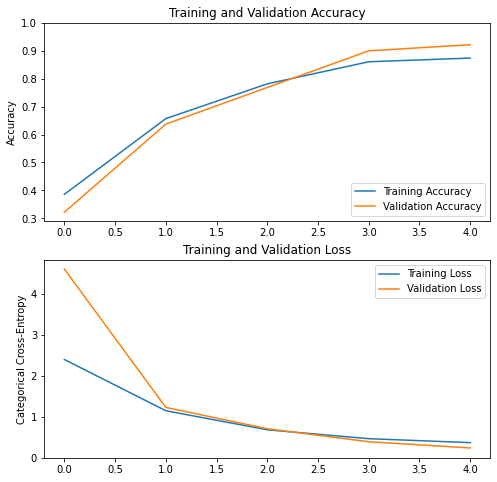

In [21]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross-Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Evaluate/Predict/.....

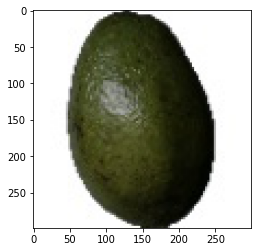

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import imread

#loading and preprocessing fruits
IMAGE_PATH='/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test/0013.jpg'
imread=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
imread=tf.keras.preprocessing.image.img_to_array(imread)

#view the image
plt.imshow(imread/255.)

In [ ]:
from numpy import genfromtxt
import csv
import requests
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

#make model predictions
a = np.array([imread])
imread=tf.keras.applications.xception.preprocess_input(imread)
predictions=model.predict(test_generator)
decode_predictions(predictions,top=5)

 12/177 [=>............................] - ETA: 31:08